# Loading Data from CSV file

* The Pandas library in Python provides excellent, built-in support for time series data.
* Pandas represents time series datasets as a **Series**. 
* A Series is a one-dimensional array with a time label for each row.
* A Dataframe is a collection of series

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Download csv file from resources and put it in working directory
dataframe = pd.read_csv('daily-total-female-births-CA.csv', header=0)

#### First five records

In [3]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Data Type

In [4]:
dataframe['date'].dtype

dtype('O')

### Loading data with parse_dates

In [2]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0 , parse_dates=[0])

#### First five records

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Data Type

In [7]:
df2['date'].dtype

dtype('<M8[ns]')

#### Note
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(.........,parse_dates=[0], date_parser=dateparse)

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

### Loading Data as a series

In [8]:
series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

#### First 5 records

In [9]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

# Exploring Time Series Data

#### Size

In [10]:
series.shape

(365,)

In [11]:
df2.shape

(365, 2)

### Querying by time

In [12]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [13]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


### Descriptive Statistics

In [14]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [15]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Feature Engineering

* Date time features
* Lag features
* Window features
* Expanding feature


### Date time features

In [2]:
df2.head(5)

NameError: name 'df2' is not defined

In [17]:
features = df2.copy()

In [18]:
features['year'] = df2['date'].dt.year

In [19]:
features['month'] = df2['date'].dt.month

In [20]:
features['day'] = df2['date'].dt.day

In [21]:
features.head(5)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/series.html#datetimelike-properties

### Lag features

To create lag1 feature

In [19]:
features['lag2'] =  df2['births'].shift(2)

In [23]:
features['lag2'] =  df2['births'].shift(365)

In [20]:
features.head(7)

,date,births,lag1,lag2
0,1959-01-01,35,NaN,NaN
1,1959-01-02,32,35.0,NaN
2,1959-01-03,30,32.0,35.0
3,1959-01-04,31,30.0,32.0
4,1959-01-05,44,31.0,30.0
5,1959-01-06,29,44.0,31.0
6,1959-01-07,45,29.0,44.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.shift.html#pandas.Series.shift

### Window features

In [25]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [26]:
features.head(5)

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [27]:
features['Roll_max'] = df2['births'].rolling(window = 3).max()

In [28]:
features.head(5)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.rolling.html#pandas.Series.rolling

### Expanding features

In [29]:
features['Expand_max'] = df2['births'].expanding().max()

In [30]:
features.head(10)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,43.0,45.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.expanding.html#pandas.Series.expanding

# Time Series - Data Visualization

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
Dataviz_df = df2.copy()

In [33]:
Dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


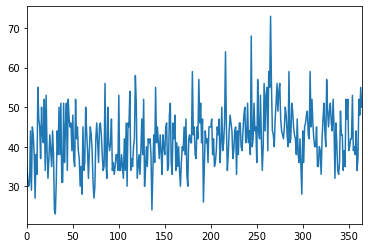

In [34]:
Dataviz_df['births'].plot()

In [35]:
Dataviz_df.index = Dataviz_df['date'] 

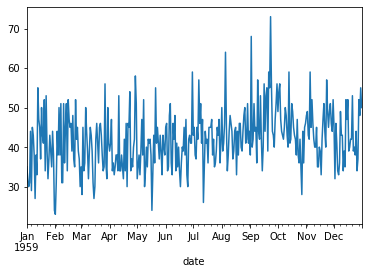

In [36]:
Dataviz_df['births'].plot()

### Zooming In

In [37]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()

In [38]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


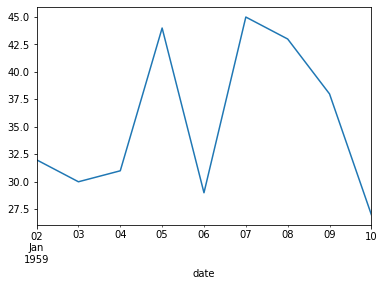

In [39]:
Dataviz_df2['births'].plot()

### Trendline

In [40]:
import seaborn as sns

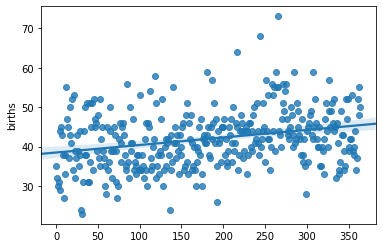

In [41]:
sns.regplot(x= df2.index.values, y=df2['births'])

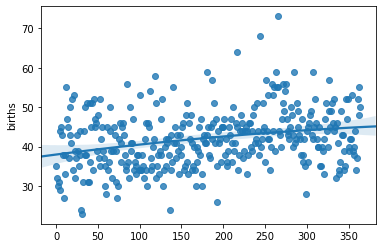

In [42]:
sns.regplot(x= df2.index.values, y=df2['births'], order =2)

In [43]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [44]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


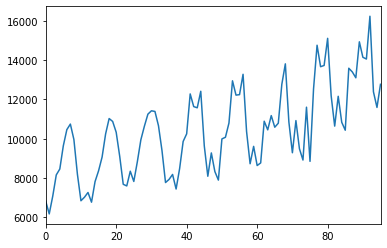

In [45]:
miles_df['MilesMM'].plot()

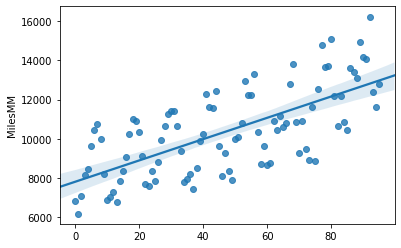

In [46]:
sns.regplot(x= miles_df.index.values, y=miles_df['MilesMM'])

### Removing Seasonality

In [47]:
miles_df['year'] = miles_df['Month'].dt.year

In [48]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [49]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

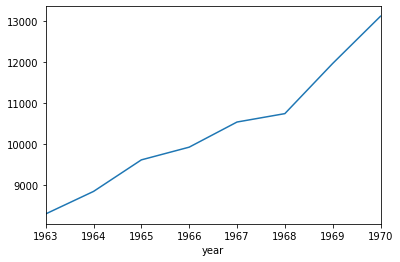

In [50]:
miles_df.groupby('year')['MilesMM'].mean().plot()

### Creating Lag plots

In [51]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [52]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


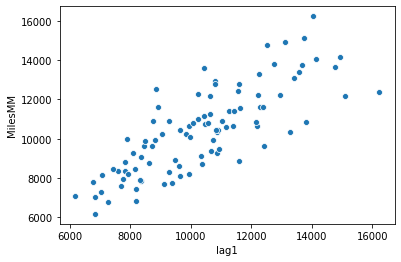

In [53]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [54]:
from pandas.plotting import lag_plot

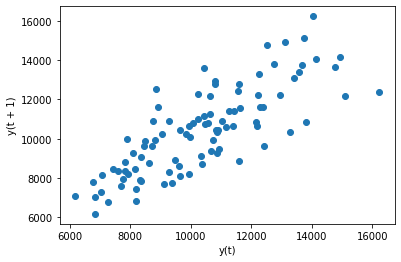

In [55]:
lag_plot(miles_df['MilesMM'])

### Autocorrelation Plots

In [56]:
from pandas.plotting import autocorrelation_plot

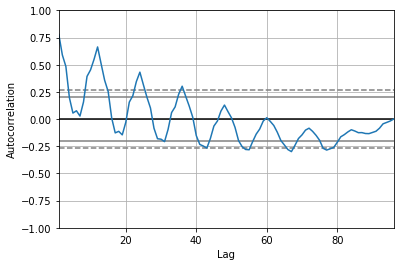

In [57]:
autocorrelation_plot(miles_df['MilesMM'])

## Downsampling and Upsampling

In [58]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [59]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


### Downsampling

In [60]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [61]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [62]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [63]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


| Alias  | Description           |
|--------|-----------------------|
| B      | Business day          |
| D      | Calendar day          |
| W      | Weekly                |
| M      | Month end             |
| Q      | Quarter end           |
| A      | Year end              |
| BA     | Business year end     |
| AS     | Year start            |
| H      | Hourly frequency      |
| T, min | Minutely frequency    |
| S      | Secondly frequency    |
| L, ms  | Millisecond frequency |
| U, us  | Microsecond frequency |
| N, ns  | Nanosecond frequency  |

### Upsampling

In [64]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [65]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [66]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [67]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


In [68]:
poly_interpolated_miles_df.head(35)

NameError: name 'poly_interpolated_miles_df' is not defined

In [ ]:
interpolated_miles_df.plot()

In [ ]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

In [ ]:
poly_interpolated_miles_df.plot()

| Method  | Description                                               |
|---------|-----------------------------------------------------------|
| bfill   | Backward fill                                             |
| count   | Count of values                                           |
| ffill   | Forward fill                                              |
| first   | First valid data value                                    |
| last    | Last valid data value                                     |
| max     | Maximum data value                                        |
| mean    | Mean of values in time range                              |
| median  | Median of values in time range                            |
| min     | Minimum data value                                        |
| nunique | Number of unique values                                   |
| ohlc    | Opening value, highest value, lowest value, closing value |
| pad     | Same as forward fill                                      |
| std     | Standard deviation of values                              |
| sum     | Sum of values                                             |
| var     | Variance of values                                        |

## Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
miles_decomp_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [122]:
miles_decomp_df.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


In [7]:
miles_decomp_df.index = miles_decomp_df['Month'] 

In [8]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

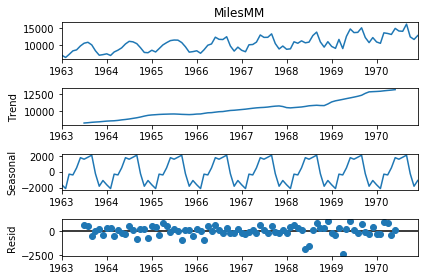

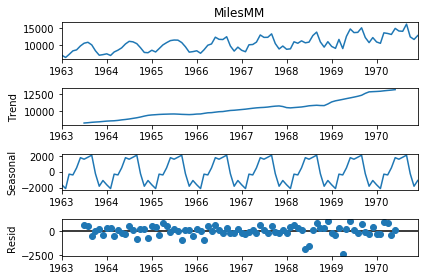

In [9]:
result.plot()

In [10]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

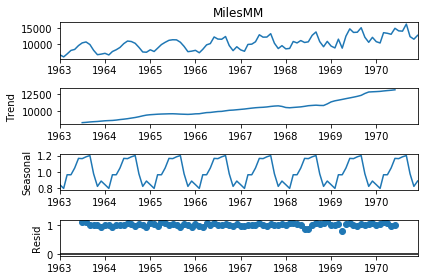

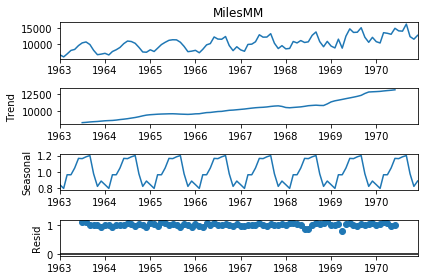

In [11]:
result2.plot()

### Differencing

In [12]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [13]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [14]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [15]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [16]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


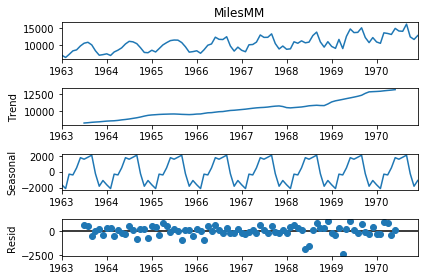

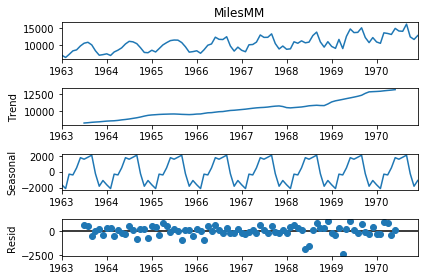

In [17]:
miles_df.index = miles_df['Month'] 
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

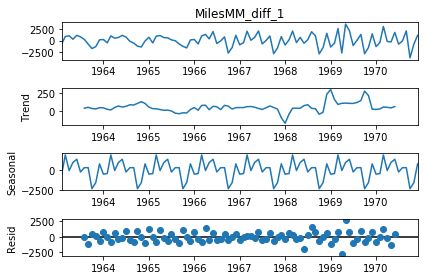

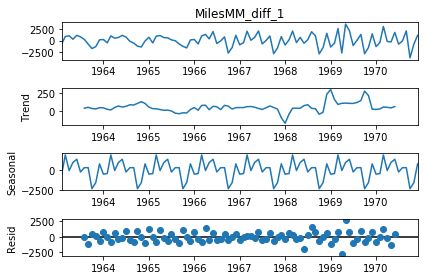

In [18]:
miles_df.index = miles_df['Month'] 
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

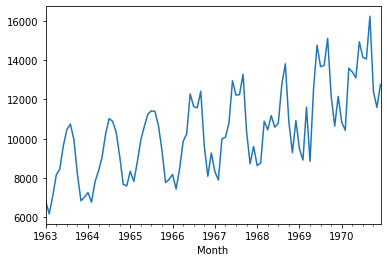

In [19]:
miles_df['MilesMM'].plot()

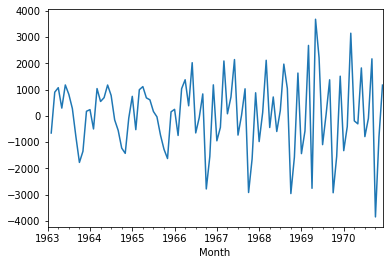

In [20]:
miles_df['MilesMM_diff_1'].plot() 

In [21]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

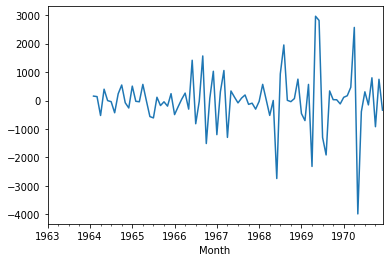

In [22]:
miles_df['MilesMM_diff_12'].plot() 

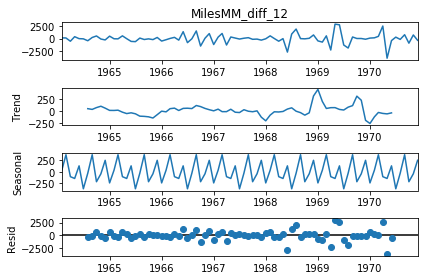

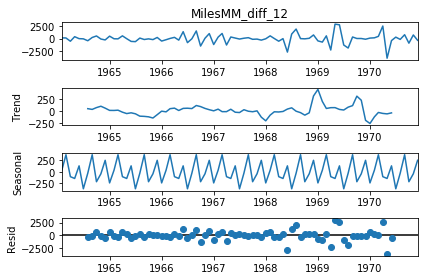

In [23]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

In [24]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


## Test-Train Split

In [25]:
temp_df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [26]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [27]:
temp_df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [28]:
temp_df.shape

(3650, 2)

In [29]:
temp_df.shape[0]

3650

In [30]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [31]:
train =  temp_df[0:train_size]

In [32]:
test =  temp_df[train_size:]

In [33]:
train.shape

(2920, 2)

In [34]:
test.shape

(730, 2)

### Walk Forward Validation

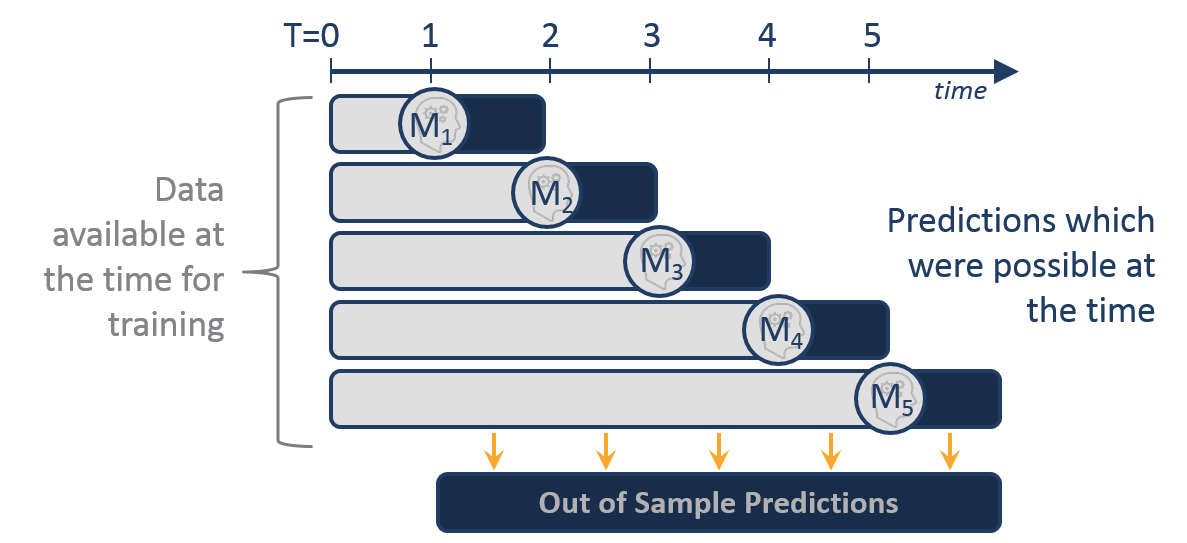

### Persistence Model

In [35]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [36]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [37]:
df['t'] =  df['Temp'].shift(1)

In [38]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [39]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [40]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [41]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

#### # walk-forward validation

In [42]:
predictions = test_X.copy()

In [43]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [45]:
from matplotlib import pyplot

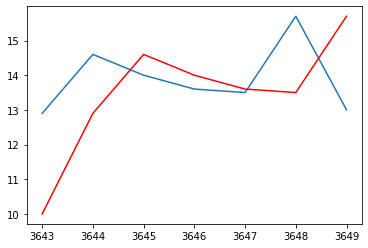

In [46]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Autoregression Model

In [47]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [48]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [123]:
train.head()

0    266.0
1    145.9
2    183.1
3    119.3
4    180.3
Name: Sales, dtype: float64

In [50]:
from statsmodels.tsa.ar_model import AR

In [51]:
model = AR(train)
model_fit = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


#### No. of lag Variables

In [52]:
model_fit.k_ar

29

#### Coef of lag variables

In [53]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [54]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [55]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [56]:
predictions.iloc[0]

11.871274847727832

In [57]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

1.5015252310069829

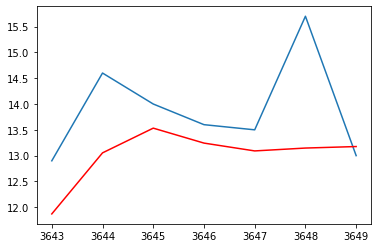

In [58]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Walk Forward

In [59]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [60]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [61]:
data = train
predict =[]
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


11.871274847727832
13.660699943835198
14.353164144090162
13.430120791627012
13.374756477185125
13.4791112994205
14.767773018439879


In [62]:
predict

[11.871274847727832,
 13.660699943835198,
 14.353164144090162,
 13.430120791627012,
 13.374756477185125,
 13.4791112994205,
 14.767773018439879]

In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.45245684251854

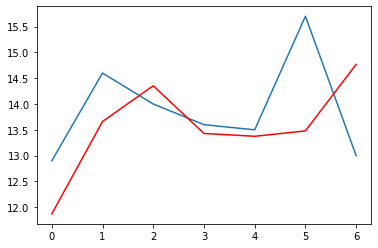

In [64]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

### Moving Average Model

In [65]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [66]:
df['t'] =  df['Temp'].shift(1)

In [67]:
df['Resid'] = df['Temp'] - df['t']

In [68]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [69]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [70]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [71]:
from statsmodels.tsa.ar_model import AR

In [72]:
model = AR(train)
model_fit = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [73]:
model_fit.k_ar

29

In [74]:
model_fit.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [75]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [76]:
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [77]:
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [78]:
predictions = df.t[df.shape[0]-7:] + pred_resid

In [79]:
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [80]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

2.049398556648206

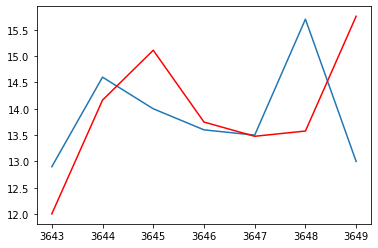

In [81]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

## ARIMA Model

In [82]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [83]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


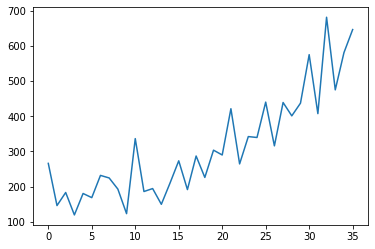

In [84]:
df['Sales'].plot()

Trend is Polynomial.  
D =2

### Autocorrelation Plot

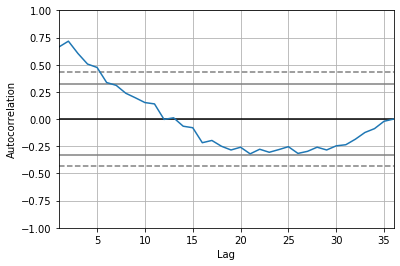

In [85]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

 q = 5 

### Partial Autocorrelation Graph

In [86]:
from statsmodels.graphics.tsaplots import plot_pacf

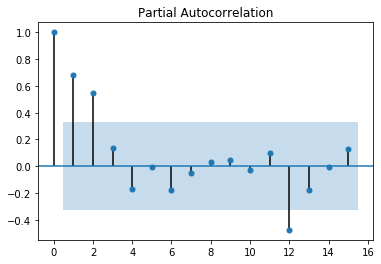

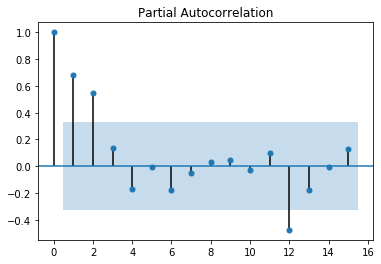

In [87]:
plot_pacf(df['Sales'], lags=15)

p = 2

In [88]:
from statsmodels.tsa.arima_model import ARIMA

In [89]:
model = ARIMA(df['Sales'], order=(5,2,2))

In [90]:
model_fit = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [91]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -189.034
Method:                       css-mle   S.D. of innovations             54.343
Date:                Sun, 13 Dec 2020   AIC                            396.067
Time:                        23:14:25   BIC                            409.805
Sample:                             2   HQIC                           400.752
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9167      0.256      3.574      0.000       0.414       1.419
ar.L1.D2.Sales    -2.1873      0.184    -11.887      0.000      -2.548      -1.827
ar.L2.D2.Sales    -2.1231      0.405     -5.246      0.000      -2.916      -1.330
ar.L3.D2.Sales    -1.6013      0.478     -3.353      0.001      -2.537      -0.665
ar.L4.D2.Sales    -1.0317      0.409     -2.520      0.012      -1.834      -0.229
ar.L5.D2.Sales    -0.3193      0.193     -1.653      0.098      -0.698       0.059
ma.L1.D2.Sales    -0.0002      0.120     -0.002      0.998      -0.235       0.234
ma.L2.D2.Sales    -0.9998      0.120     -8.363      0.000      -1.234      -0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1409           -1.3030j            1.3106           -0.2329
AR.2            0.1409           +1.3030j            1.3106            0.2329
AR.3           -1.1313           -0.4225j            1.2076           -0.4431
AR.4           -1.1313           +0.4225j            1.2076            0.4431
AR.5           -1.2502           -0.0000j            1.2502           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0002           +0.0000j            1.0002            0.5000
-----------------------------------------------------------------------------
"""

In [92]:
residuals = model_fit.resid

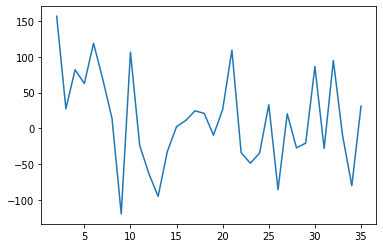

In [93]:
residuals.plot()

In [94]:
residuals.describe()

count     34.000000
mean      11.293855
std       65.989793
min     -119.295696
25%      -31.207155
50%       12.481503
75%       55.127849
max      156.383323
dtype: float64

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [95]:
output = model_fit.forecast()

In [96]:
output

(array([636.15148334]),
 array([54.34286347]),
 array([[529.64142812, 742.66153855]]))

In [97]:
model_fit.forecast(5)[0]

array([636.15148334, 709.19180983, 664.3330911 , 771.11928552,
       761.60381712])

### Walk Forward ARIMA

In [98]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [99]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


def parser(x):
return datetime.strptime('190'+x, '%Y-%m')

In [100]:
train_size = int(df.shape[0]*0.7)

In [101]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [102]:
test.shape

(11,)

In [103]:
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)

387.3764645395876
348.1541436834551
386.30880112815987
356.0820881964668
446.3794710820297
394.73728843470417
434.9154133760461
507.9234715144021
435.48276116299513
652.7439008036883
546.3434721834466


In [104]:
predict

[387.3764645395876,
 348.1541436834551,
 386.30880112815987,
 356.0820881964668,
 446.3794710820297,
 394.73728843470417,
 434.9154133760461,
 507.9234715144021,
 435.48276116299513,
 652.7439008036883,
 546.3434721834466]

In [105]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

8119.124448295092

## SARIMA or Seasonal ARIMA 

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [107]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [108]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [109]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [110]:
df.index = df['Month'] 

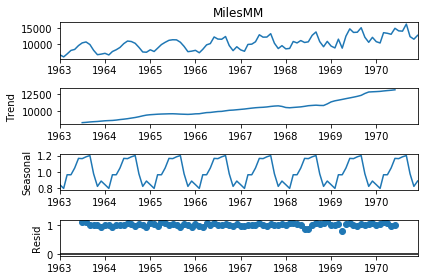

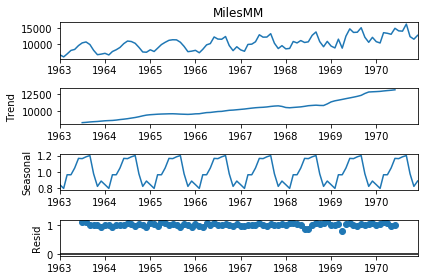

In [111]:
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [112]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [113]:
model_fit = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [114]:
residuals = model_fit.resid

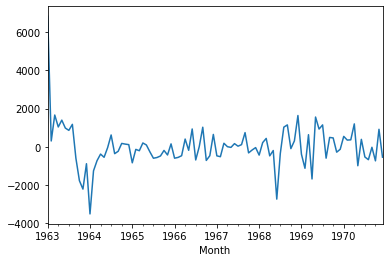

In [115]:
residuals.plot()

In [116]:
output = model_fit.forecast()

In [117]:
output

1971-01-01    11475.532536
Freq: MS, dtype: float64

In [118]:
model_fit.forecast(12)

1971-01-01    11475.532536
1971-02-01    11153.475571
1971-03-01    13669.193151
1971-04-01    12646.965728
1971-05-01    14338.968298
1971-06-01    15785.964758
1971-07-01    14978.849458
1971-08-01    15362.266461
1971-09-01    16962.519721
1971-10-01    13682.001475
1971-11-01    12426.693158
1971-12-01    13729.808264
Freq: MS, dtype: float64

In [119]:
yhat = model_fit.predict()

In [120]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5871.640800
1963-03-01    5421.493258
1963-04-01    7123.129686
1963-05-01    7066.719225
Freq: MS, dtype: float64

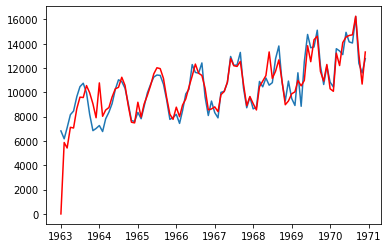

In [121]:
pyplot.plot(df['MilesMM'])
pyplot.plot(yhat, color='red')